# What we'll study in data mining

A famous problem is to write a program that can "read" the number that is contained in an image.

![MNIST digits](img/mnist.png)

It is hard to manually write a program to do this.
In this class, we will study algorithms that learn how to perform this task automatically from data.

## Load the MNIST data

In [1]:
# load MNIST dataset
from sklearn.datasets import fetch_openml
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

# create train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=50000, test_size=10000, random_state=0
)

# print debug info
print('X_train.shape=', X_train.shape)
print('y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape)
print('y_test.shape=', y_test.shape)

X_train.shape= (50000, 784)
y_train.shape= (50000,)
X_test.shape= (10000, 784)
y_test.shape= (10000,)


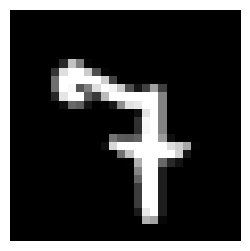

In [2]:
# visualize the data
import matplotlib.pyplot as plt
%matplotlib inline

image = X_train.iloc[0].to_numpy().reshape([28,28])
fig = plt.figure(figsize=(3,3))
plt.axis('off')
plt.imshow(image, cmap='gray')
plt.show()

## Training a model

Now that we have some data, we can train a model on the data.
The following code trains and evaluates a Logistic Regression model.

In [ ]:
# train the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# evaluate model
accuracy = clf.score(X_test, y_test)
print("accuracy: %.4f" % accuracy)

The popular library scikit learn has many models included.  Training different types of models is a trivial code change.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=[10])
model.fit(X_train, y_train)

Furthermore, each model has many different "hyperparameters" which affect the runtime and accuracy of the model.  (See for example <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html>.)

Since this is a DATA SCIENCE class, the focus will be on determining which model to use and which hyperparameters.
We will not focus on how to implement these models.

If this were a COMPUTER SCIENCE class, the focus would be more on implementation that application.

## Takeaway

1. The programming is EASY.
1. Selecting the best algorithm and hyperparameters is HARD and requires a lot of math.

   That math is the focus of this course.